In [1]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
feature_extracting_cleaned = pd.read_csv('C:/Users/mayuo/OneDrive/Documents/Machine Learning by Abraham/interview_take_home/data/feature_extract.csv')
feature_extracting_cleaned.drop(columns= 'Unnamed: 0', inplace=True)
feature_extracting_cleaned.head(3)

,ps_cluster,market_segment,sub_type,ps_weekday_working_usage,ps_weekday_nonworking_usage,ps_weekend_usage,ps_doc_average_file_size,ps_doc_average_openseconds,generic_email,count_camera_make,...,visual_media_score,traditional_art_score,commercial_design_score,design_complexity_score,social_media_score,total_visual_usage,total_design_illustration_usage,total_adobe_activity_score,video_media_creation_score,design_engagement_score
0,Photo Enthusiast,COMMERCIAL,Phtoshp Lightrm Bndl,0.621516,0.000000,0.378484,Small,Long,True,0.005525,...,0.016575,0.005525,0.0,0.001842,0.016575,0.276243,0.027624,0.042357,0.0,0.0
1,Independent Photo Pro,COMMERCIAL,Phtoshp Lightrm Bndl,0.719328,0.014286,0.266387,Medium,Long,True,0.005525,...,0.000000,0.000000,0.0,0.000000,0.000000,0.151934,0.151934,0.012891,0.0,0.0
2,Independent Photo Pro,COMMERCIAL,Phtoshp Lightrm Bndl,0.566488,0.244484,0.189028,Small,Short,True,0.011050,...,0.000000,0.000000,0.0,0.000000,0.000000,0.831492,0.279006,0.029466,0.0,0.0


In [31]:
X = feature_extracting_cleaned.drop(columns=['ps_cluster'])  # drop target column
y = feature_extracting_cleaned['ps_cluster']  # target variable

In [32]:
# Categorical columns to be one-hot encoded
categorical_cols = ['ps_doc_average_file_size', 'ps_doc_average_openseconds', 
                    'machine_ps_max_numprocessors', 'memory_category', 'machine_ps_speed_bin']

In [33]:
# Numerical columns to be scaled
numerical_cols = X.select_dtypes(include=['float64']).columns.tolist()

In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scaling numerical features
        ('cat', OneHotEncoder(), categorical_cols)   # One-hot encoding categorical features
    ])

# Build a pipeline with preprocessing and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [35]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ps_weekday_working_usage',
                                                   'ps_weekday_nonworking_usage',
                                                   'ps_weekend_usage',
                                                   'count_camera_make',
                                                   'count_camera_model',
                                                   'total_video_usage',
                                                   'total_3d_usage',
                                                   'num_used_products',
                                                   'camera_usage_ratio',
                                                   'digital_design_score',
                                                   'visual_media_score',
                                                   'traditional_art_score...
                                                   'total_visual_usage',
                                                   'total_design_illustration_usage',
                                                   'total_adobe_activity_score',
                                                   'video_media_creation_score',
                                                   'design_engagement_score']),
                                                 ('cat', OneHotEncoder(),
                                                  ['ps_doc_average_file_size',
                                                   'ps_doc_average_openseconds',
                                                   'machine_ps_max_numprocessors',
                                                   'memory_category',
                                                   'machine_ps_speed_bin'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [36]:
# Predict on the test set
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1387
           1       1.00      1.00      1.00      3204
           2       1.00      1.00      1.00      1398
           3       1.00      1.00      1.00      2231

    accuracy                           1.00      8220
   macro avg       1.00      1.00      1.00      8220
weighted avg       1.00      1.00      1.00      8220

Training Confusion Matrix:


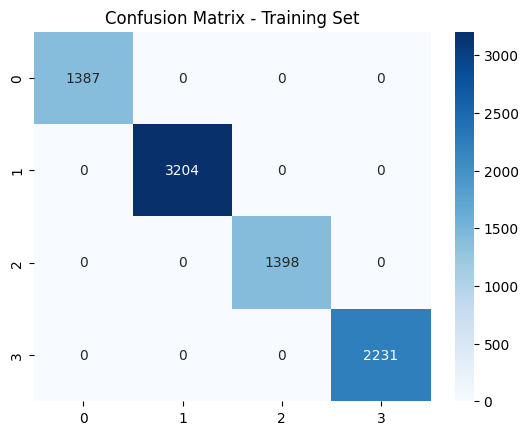

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       350
           1       0.94      0.97      0.96       803
           2       0.97      0.95      0.96       365
           3       0.92      0.94      0.93       538

    accuracy                           0.94      2056
   macro avg       0.95      0.93      0.94      2056
weighted avg       0.94      0.94      0.94      2056

Testing Confusion Matrix:


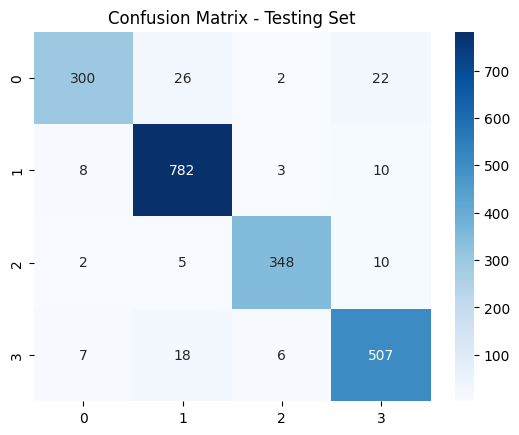

In [37]:
# Classification report and confusion matrix for training set
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Training Confusion Matrix:")
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.title('Confusion Matrix - Training Set')
plt.show()

# Classification report and confusion matrix for testing set
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

print("Testing Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.title('Confusion Matrix - Testing Set')
plt.show()

In [16]:
feature_extracting_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10276 entries, 0 to 10275
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ps_cluster                       10276 non-null  object 
 1   market_segment                   10276 non-null  object 
 2   sub_type                         10276 non-null  object 
 3   ps_weekday_working_usage         10276 non-null  float64
 4   ps_weekday_nonworking_usage      10276 non-null  float64
 5   ps_weekend_usage                 10276 non-null  float64
 6   ps_doc_average_file_size         10276 non-null  object 
 7   ps_doc_average_openseconds       10276 non-null  object 
 8   generic_email                    10276 non-null  bool   
 9   count_camera_make                10276 non-null  float64
 10  count_camera_model               10276 non-null  float64
 11  total_video_usage                10276 non-null  float64
 12  total_3d_usage    

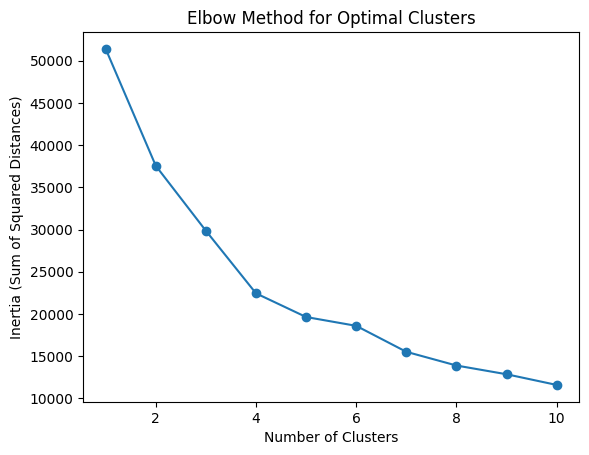

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Select a combination of features for clustering
features_for_clustering = feature_extracting_cleaned[['total_adobe_activity_score', 
                                              'video_media_creation_score', 
                                              'design_engagement_score', 
                                              'total_visual_usage', 
                                              'total_design_illustration_usage']]  # Choose features for clustering

# Step 2: Scale the features for clustering (important for KMeans)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Step 3: Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):  # Test cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Step 4: Plot the Elbow Curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()


In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Select the features for clustering
clustering_features = feature_extracting_cleaned[['ps_weekday_working_usage', 'ps_weekday_nonworking_usage', 'ps_weekend_usage', 
                                           'count_camera_make', 'count_camera_model', 'total_video_usage', 
                                           'total_3d_usage', 'num_used_products', 'camera_usage_ratio', 
                                           'digital_design_score', 'visual_media_score', 'traditional_art_score', 
                                           'commercial_design_score', 'design_complexity_score', 
                                           'social_media_score', 'total_visual_usage', 
                                           'total_design_illustration_usage', 'total_adobe_activity_score', 
                                           'video_media_creation_score', 'design_engagement_score']]

# Step 2: Standardize the data
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

# Step 3: Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # 4 clusters
clusters = kmeans.fit_predict(clustering_features_scaled)

# Step 4: Append the cluster labels to the original dataframe
feature_extracting_cleaned['ps_cluster'] = clusters

# Now you have the original dataframe with the new 'ps_cluster' column
# You can verify the cluster labels have been added
print(feature_extracting_cleaned[['ps_cluster']].head())


   ps_cluster
0           1
1           1
2           1
3           1
4           3


In [28]:
feature_extracting_cleaned.head()

,ps_cluster,market_segment,sub_type,ps_weekday_working_usage,ps_weekday_nonworking_usage,ps_weekend_usage,ps_doc_average_file_size,ps_doc_average_openseconds,generic_email,count_camera_make,...,visual_media_score,traditional_art_score,commercial_design_score,design_complexity_score,social_media_score,total_visual_usage,total_design_illustration_usage,total_adobe_activity_score,video_media_creation_score,design_engagement_score
0,1,COMMERCIAL,Phtoshp Lightrm Bndl,0.621516,0.000000,0.378484,Small,Long,True,0.005525,...,0.016575,0.005525,0.000000,0.001842,0.016575,0.276243,0.027624,0.042357,0.000000,0.000000
1,1,COMMERCIAL,Phtoshp Lightrm Bndl,0.719328,0.014286,0.266387,Medium,Long,True,0.005525,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.151934,0.151934,0.012891,0.000000,0.000000
2,1,COMMERCIAL,Phtoshp Lightrm Bndl,0.566488,0.244484,0.189028,Small,Short,True,0.011050,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.831492,0.279006,0.029466,0.000000,0.000000
3,1,COMMERCIAL,Others,1.000000,0.000000,0.000000,Small,Medium,False,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005525,0.000000,0.062615
4,3,EDUCATION,Creative Cloud Indiv,0.437382,0.556136,0.006481,Small,Short,False,0.005525,...,0.005525,0.005525,0.005525,0.018416,0.005525,2.303867,2.530387,0.257827,0.066298,0.235727


In [39]:
# Get the cluster centers (centroids)
centroids = kmeans.cluster_centers_

# Convert to a DataFrame for easier interpretation
centroids_df = pd.DataFrame(centroids, columns=numerical_cols)

# Check the centroids for each cluster
centroids_df

# Based on these values, you can assign names to the clusters

,ps_weekday_working_usage,ps_weekday_nonworking_usage,ps_weekend_usage,count_camera_make,count_camera_model,total_video_usage,total_3d_usage,num_used_products,camera_usage_ratio,digital_design_score,visual_media_score,traditional_art_score,commercial_design_score,design_complexity_score,social_media_score,total_visual_usage,total_design_illustration_usage,total_adobe_activity_score,video_media_creation_score,design_engagement_score
0,0.305166,-0.128632,-0.257685,1.253951,1.300847,0.635499,0.166701,0.434469,1.214338,1.354659,1.386492,1.109495,1.217348,1.371028,1.386492,0.726309,0.866363,1.359804,0.172437,0.700336
1,0.840569,-0.569534,-0.518202,-0.231186,-0.231084,-0.189948,-0.091497,-0.018578,-0.223196,-0.268601,-0.297256,-0.249747,-0.216494,-0.268195,-0.297256,-0.244198,-0.242403,-0.221327,0.007651,0.044604
2,-1.001977,-0.496122,1.663675,-0.433971,-0.417459,-0.230776,-0.073578,-0.262042,-0.433634,-0.374562,-0.348909,-0.273418,-0.314543,-0.378250,-0.348909,-0.308574,-0.334044,-0.606517,-0.140789,-0.357152
3,-0.771692,1.222058,-0.146659,-0.175786,-0.215887,0.023295,0.074805,-0.078950,-0.162712,-0.222614,-0.217406,-0.160443,-0.250150,-0.231129,-0.217406,0.094450,0.020147,-0.146648,-0.029683,-0.276850


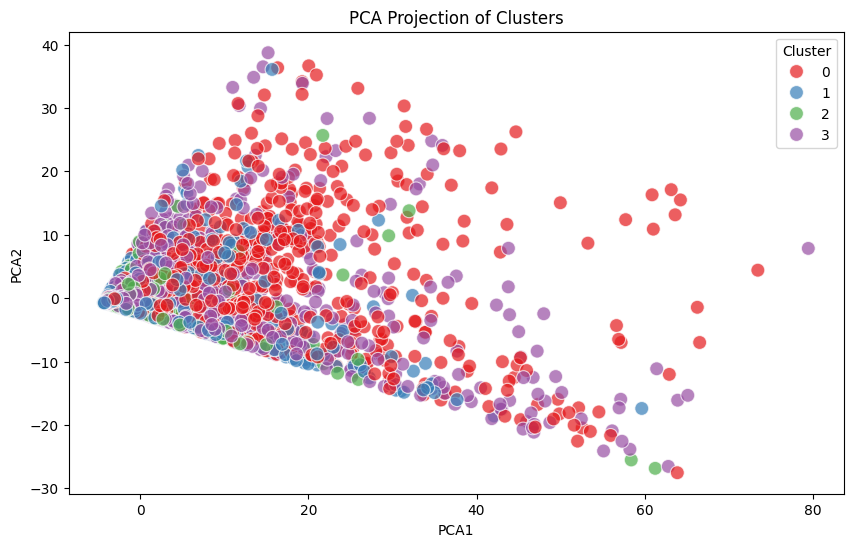

In [40]:
from sklearn.decomposition import PCA

# Perform PCA to reduce to 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(feature_extracting_cleaned[numerical_cols])

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = feature_extracting_cleaned['ps_cluster']  # Add the cluster labels

# Plot the 2D PCA projection
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100, alpha=0.7)
plt.title('PCA Projection of Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster', loc='best')
plt.show()


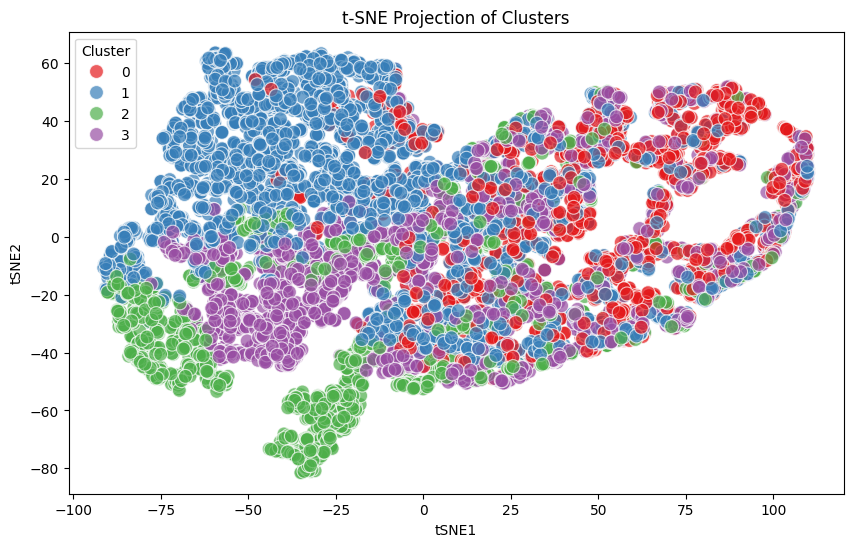

In [41]:
from sklearn.manifold import TSNE

# Perform t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(feature_extracting_cleaned[numerical_cols])

# Create a DataFrame for the t-SNE components
tsne_df = pd.DataFrame(tsne_components, columns=['tSNE1', 'tSNE2'])
tsne_df['Cluster'] = feature_extracting_cleaned['ps_cluster']  # Add the cluster labels

# Plot the 2D t-SNE projection
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='tSNE1', y='tSNE2', hue='Cluster', palette='Set1', s=100, alpha=0.7)
plt.title('t-SNE Projection of Clusters')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.legend(title='Cluster', loc='best')
plt.show()


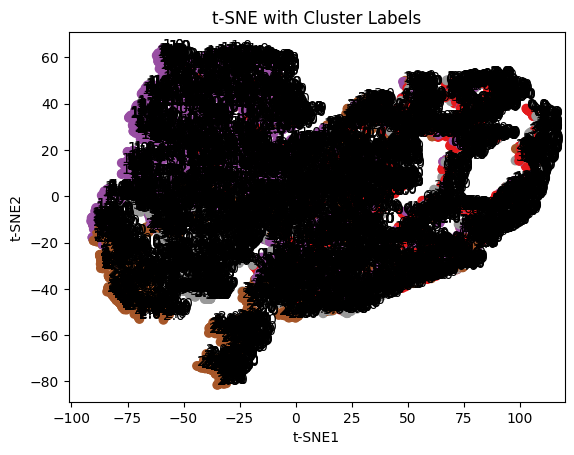

In [42]:
# Adding labels for the clusters
for i in range(len(tsne_df)):
    plt.text(tsne_df.iloc[i]['tSNE1'], tsne_df.iloc[i]['tSNE2'],
             str(tsne_df.iloc[i]['Cluster']), color='black', fontsize=10)

plt.scatter(tsne_df['tSNE1'], tsne_df['tSNE2'], c=tsne_df['Cluster'], cmap='Set1')
plt.title("t-SNE with Cluster Labels")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.show()
